In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [1]:


t = np.linspace(0, 30*2*np.pi, 30*24*2)
td = pd.date_range("2020-01-01", freq='30T', periods=t.size)

T0 = np.sin(t)*8 - 15 + np.random.randn(t.size)*0.2
T1 = np.sin(t)*7 - 13 + np.random.randn(t.size)*0.1
T2 = np.sin(t)*9 - 10 + np.random.randn(t.size)*0.3
T3 = np.sin(t)*8.5 - 11 + np.random.randn(t.size)*0.5
T = np.vstack([T0, T1, T2, T3]).T

features = pd.DataFrame(T, columns=["s1", "s2", "s3", "s4"], index=td)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_2500\3421763683.py:6: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  td = pd.date_range("2020-01-01", freq='30T', periods=t.size)


In [5]:
print(features)

                            s1         s2         s3         s4
2020-01-01 00:00:00 -15.125473 -13.101716 -10.216759 -10.160586
2020-01-01 00:30:00 -13.713147 -12.162583  -8.514932  -9.772406
2020-01-01 01:00:00 -12.833183 -11.089297  -7.850384  -8.876154
2020-01-01 01:30:00 -11.929415 -10.208109  -6.695651  -8.009625
2020-01-01 02:00:00 -10.793423  -9.598434  -5.601670  -6.934743
...                        ...        ...        ...        ...
2020-01-30 21:30:00 -19.273156 -16.555251 -14.299911 -15.088725
2020-01-30 22:00:00 -18.134791 -15.578909 -13.397253 -14.321515
2020-01-30 22:30:00 -16.920901 -14.920949 -12.253928 -13.451448
2020-01-30 23:00:00 -16.053968 -13.931326 -11.069331 -12.795031
2020-01-30 23:30:00 -15.234518 -13.139842  -9.853165 -10.928077

[1440 rows x 4 columns]


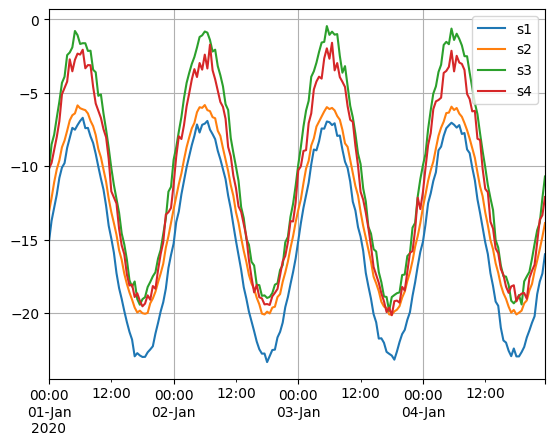

In [2]:
axe = features[:"2020-01-04"].plot()
axe.legend()
axe.grid()

In [10]:
df = pd.read_csv(r'G:\fresh_start\paper\code_paper\main_data\raw_data\df33333333_Nan.csv')

In [11]:
grouped = df.groupby('date')

In [12]:
lapse_rate = -0.0065
filled_df = pd.DataFrame()
for  date, group in grouped:
    

    missing_tmin = group['Tmin'].isna()
    missing_tmax = group['Tmax'].isna()

    known_tmin = group.loc[~missing_tmin, 'Tmin']
    known_elevations_tmin = group.loc[~missing_tmin, 'elevation']
    
    known_tmax = group.loc[~missing_tmax, 'Tmax']
    known_elevations_tmax = group.loc[~missing_tmax, 'elevation']
    
    for i, row in group[missing_tmin].iterrows():
        if not known_tmin.empty:
            min_elev_dif = row['elevation'] - known_elevations_tmin
            est_tmin = known_tmin + (min_elev_dif * lapse_rate)
            group.at[i, 'Tmin'] = est_tmin.mean()    


    for i, row in group[missing_tmax].iterrows():
        if not known_tmax.empty:
            max_elev_dif = row['elevation'] - known_elevations_tmax
            est_tmax = known_tmax + (max_elev_dif * lapse_rate)
            group.at[i, 'Tmax'] = est_tmax.mean()
        
    
    filled_df = pd.concat([filled_df, group], ignore_index=True)
    
filled_df
     
    

,date,station,regions,lat,long,elevation,Tmin,Tmax
0,1962-01-01,1316,Tarai,26.820440,87.159170,105.0,15.432384,27.691517
1,1962-01-01,1201,High Mountain,27.816670,86.716670,3450.0,-6.310116,5.949017
2,1962-01-01,1401,High Mountain,27.683330,87.783330,3119.0,-4.158616,8.100517
3,1962-01-01,1225,High Mountain,27.816670,86.716670,3700.0,-7.935116,4.324017
4,1962-01-01,1218,High Mountain,27.833330,86.766670,3857.0,-8.955616,3.303517
...,...,...,...,...,...,...,...,...
512534,2022-12-31,1307,Hill,26.983219,87.345956,1192.0,7.200000,19.000000
512535,2022-12-31,1024,Hill,27.616117,85.565503,1543.0,4.000000,17.000000
512536,2022-12-31,1419,Hill,27.143674,87.765595,1157.0,8.500000,20.000000
512537,2022-12-31,1314,Hill,27.123040,87.536190,1525.0,6.500000,15.000000


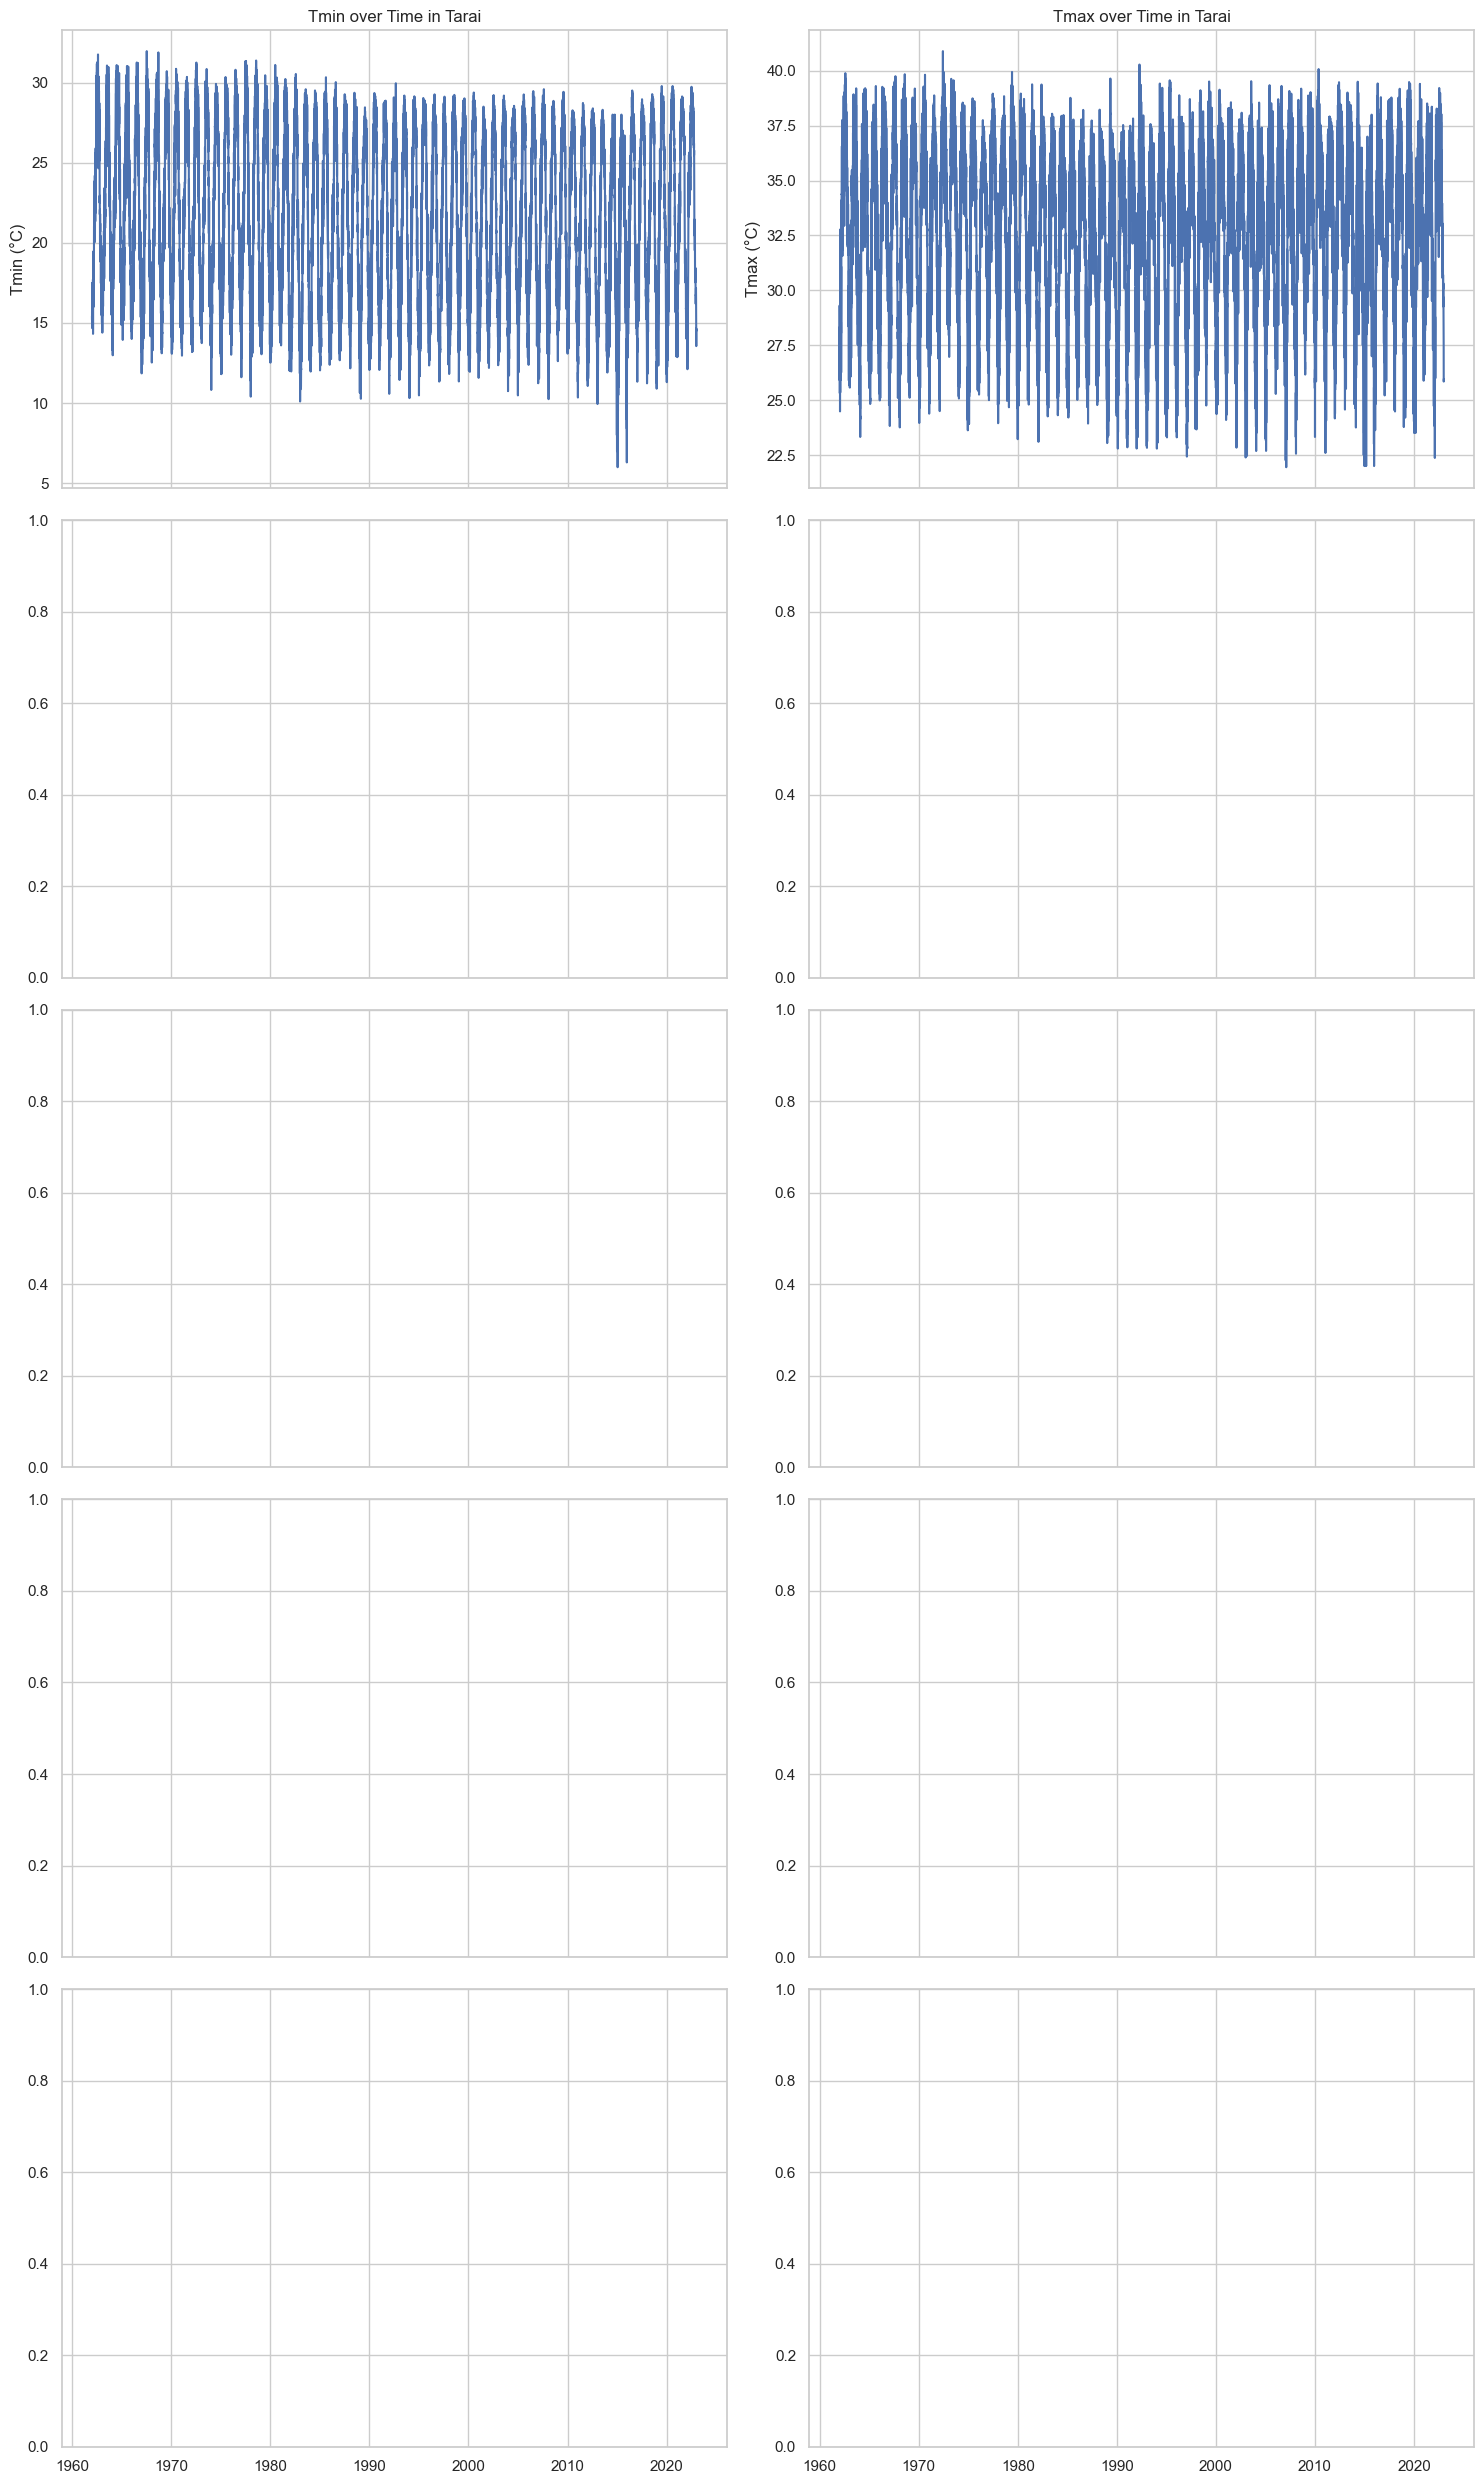

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
filled_df['date'] = pd.to_datetime(filled_df['date'])

# Set the style for seaborn plots
sns.set(style='whitegrid')

# Create a figure with subplots for each region (Tmin and Tmax)
regions = filled_df['regions'].unique()
fig, axes = plt.subplots(len(regions), 2, figsize=(15, 5 * len(regions)), sharex=True)

# Loop over each region and plot Tmin and Tmax
for i, region in enumerate(regions):
    region_data = filled_df[filled_df['regions'] == region]
    
    # Plot Tmin
    sns.lineplot(ax=axes[i, 0], x='date', y='Tmin', data=region_data)
    axes[i, 0].set_title(f'Tmin over Time in {region}')
    axes[i, 0].set_ylabel('Tmin (°C)')
    
    # Plot Tmax
    sns.lineplot(ax=axes[i, 1], x='date', y='Tmax', data=region_data)
    axes[i, 1].set_title(f'Tmax over Time in {region}')
    axes[i, 1].set_ylabel('Tmax (°C)')
    break

# Adjust layout
plt.tight_layout()
plt.show()

In [13]:
#filled_df.to_csv(r"lapsssssssssssssseeeeeeeee.csv", index=False)

In [11]:
import pandas as pd
import numpy as np

# Sample lapse rate in degrees Celsius per kilometer
LAPSE_RATE = -0.0065 # typical lapse rate in °C/km

# Sample DataFrame df with columns 'date', 'station', 'elevation', 'Tmin', 'Tmax'
# Ensure 'date' is in datetime format
df['date'] = pd.to_datetime(df['date'])

def fill_missing_with_elevation(df, lapse_rate):
    # Group data by date
    grouped = df.groupby('date')

    filled_df = pd.DataFrame()

    for date, group in grouped:
        # Find missing values
        missing_tmin = group['Tmin'].isna()
        missing_tmax = group['Tmax'].isna()
        
        # If there are missing values
        if missing_tmin.any() or missing_tmax.any():
            # Use non-missing values for interpolation
            known_tmin = group.loc[~missing_tmin, 'Tmin']
            known_elevations_tmin = group.loc[~missing_tmin, 'elevation']
            
            known_tmax = group.loc[~missing_tmax, 'Tmax']
            known_elevations_tmax = group.loc[~missing_tmax, 'elevation']
            
            # Calculate missing Tmin
            for i, row in group[missing_tmin].iterrows():
                # Calculate estimated Tmin based on lapse rate
                if not known_tmin.empty:
                    avg_tmin = known_tmin.mean()
                    avg_elevation_tmin = known_elevations_tmin.mean()
                    est_tmin = avg_tmin + lapse_rate * (row['elevation'] - avg_elevation_tmin) / 1000.0
                    df.at[i, 'Tmin'] = est_tmin
            
            # Calculate missing Tmax
            for i, row in group[missing_tmax].iterrows():
                # Calculate estimated Tmax based on lapse rate
                if not known_tmax.empty:
                    avg_tmax = known_tmax.mean()
                    avg_elevation_tmax = known_elevations_tmax.mean()
                    est_tmax = avg_tmax + lapse_rate * (row['elevation'] - avg_elevation_tmax) / 1000.0
                    df.at[i, 'Tmax'] = est_tmax
        
        # Append the filled group to the DataFrame
        filled_df = pd.concat([filled_df, group], ignore_index=True)
    
    return filled_df

# Fill missing temperatures using elevation differences
df_filled = fill_missing_with_elevation(df, LAPSE_RATE)

# Display the DataFrame with missing temperatures filled
print(df_filled.head())


        date  station        regions       lat      long  elevation  \
0 1962-01-01     1316          Tarai  26.82044  87.15917      105.0   
1 1962-01-01     1201  High Mountain  27.81667  86.71667     3450.0   
2 1962-01-01     1401  High Mountain  27.68333  87.78333     3119.0   
3 1962-01-01     1225  High Mountain  27.81667  86.71667     3700.0   
4 1962-01-01     1218  High Mountain  27.83333  86.76667     3857.0   

           Tmin          Tmax  elevation_km  
0    702.309531    713.707325         0.105  
1  22403.827058  22414.591720         3.450  
2  20255.331568  20264.930743         3.119  
3  24026.193148  24034.027161         3.700  
4  25043.416779  25056.152419         3.857  


In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load your data
# df = pd.read_csv('your_data.csv')  # Replace with your data loading method

# Convert 'date' to numerical features
df['date'] = pd.to_datetime(df['date'])
df['days_since_start'] = (df['date'] - df['date'].min()).dt.days

# Define features and target variables
features = ['days_since_start', 'station', 'lat', 'long', 'elevation']
target_Tmin = 'Tmin'
target_Tmax = 'Tmax'

# Separate data with missing values from data without missing values
df_missing_Tmin = df[df[target_Tmin].isna()]
df_missing_Tmax = df[df[target_Tmax].isna()]
df_non_missing = df.dropna(subset=[target_Tmin, target_Tmax])

# Prepare the features and target variables for training
X = df_non_missing[features]
y_Tmin = df_non_missing[target_Tmin]
y_Tmax = df_non_missing[target_Tmax]

# Split dataset into train (actual data) and test (actual data)
X_train, X_test, y_train_Tmin, y_test_Tmin = train_test_split(X, y_Tmin, train_size=0.75, random_state=123)
X_train, X_test, y_train_Tmax, y_test_Tmax = train_test_split(X, y_Tmax, train_size=0.75, random_state=123)

# Create and train Linear Regressor for Tmin
reg_Tmin = LinearRegression()
reg_Tmin.fit(X_train, y_train_Tmin)

# Assess regression score with test data for Tmin
score_Tmin = reg_Tmin.score(X_test, y_test_Tmin)
print(f"R^2 Score for Tmin: {score_Tmin}")

# Predict missing values for Tmin
X_missing_Tmin = df_missing_Tmin[features]
df.loc[df[target_Tmin].isna(), target_Tmin] = reg_Tmin.predict(X_missing_Tmin)

# Create and train Linear Regressor for Tmax
reg_Tmax = LinearRegression()
reg_Tmax.fit(X_train, y_train_Tmax)

# Assess regression score with test data for Tmax
score_Tmax = reg_Tmax.score(X_test, y_test_Tmax)
print(f"R^2 Score for Tmax: {score_Tmax}")

# Predict missing values for Tmax
X_missing_Tmax = df_missing_Tmax[features]
df.loc[df[target_Tmax].isna(), target_Tmax] = reg_Tmax.predict(X_missing_Tmax)

# Check results
print(df.head())


R^2 Score for Tmin: 0.6631216188621163
R^2 Score for Tmax: 0.7119628596909022
        date  station regions       lat      long  elevation       Tmin  \
0 1962-01-01     1316   Tarai  26.82044  87.15917      105.0  19.457480   
1 1962-01-02     1316   Tarai  26.82044  87.15917      105.0  19.457541   
2 1962-01-03     1316   Tarai  26.82044  87.15917      105.0  19.457601   
3 1962-01-04     1316   Tarai  26.82044  87.15917      105.0  19.457662   
4 1962-01-05     1316   Tarai  26.82044  87.15917      105.0  19.457722   

        Tmax  days_since_start  
0  29.789013                 0  
1  29.789117                 1  
2  29.789220                 2  
3  29.789323                 3  
4  29.789426                 4  


In [8]:
print(df)

             date  station        regions        lat       long  elevation  \
0      1962-01-01     1316          Tarai  26.820440  87.159170      105.0   
1      1962-01-02     1316          Tarai  26.820440  87.159170      105.0   
2      1962-01-03     1316          Tarai  26.820440  87.159170      105.0   
3      1962-01-04     1316          Tarai  26.820440  87.159170      105.0   
4      1962-01-05     1316          Tarai  26.820440  87.159170      105.0   
...           ...      ...            ...        ...        ...        ...   
512534 2022-12-27     9999  High Mountain  27.961111  86.808889     5200.0   
512535 2022-12-28     9999  High Mountain  27.961111  86.808889     5200.0   
512536 2022-12-29     9999  High Mountain  27.961111  86.808889     5200.0   
512537 2022-12-30     9999  High Mountain  27.961111  86.808889     5200.0   
512538 2022-12-31     9999  High Mountain  27.961111  86.808889     5200.0   

             Tmin       Tmax  days_since_start  
0       19.457